# The scenario
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.


# Steps
1. Load the houseprices data from Thinkful's database.
2. Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.
3. Now, split your data into train and test sets where 20% of the data resides in the test set.
4. Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!
5. Evaluate your best model on the test set.
6. So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

### Load the houseprices data from Thinkful's database.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


## Data cleaning

In [3]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

### Calculate the percentages of the missing values in all columns

In [4]:
total = houseprice_df.isnull().sum().sort_values(ascending=False)
percent = (houseprice_df.isnull().sum()/houseprice_df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garagecond,81,5.547945
garagetype,81,5.547945
garageyrblt,81,5.547945
garagefinish,81,5.547945


__poolqc, miscfeature, alley, fence, fireplacequ, and lotfrontage__ have more than 15 % of missing values. Filling the missing value with respect to these variables should be dangerous because most variables are categorical except lotfrontage, and also these are not time-series.
In the case of **garageyrblt* should be

In [5]:
missingList = ['garagecond','garagetype','garageyrblt','garagefinish','garagequal','bsmtexposure','bsmtfintype2','bsmtfintype1','bsmtcond','bsmtqual','masvnrarea','masvnrtype','electrical']
houseprice_df[missingList].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
garagecond      1379 non-null object
garagetype      1379 non-null object
garageyrblt     1379 non-null float64
garagefinish    1379 non-null object
garagequal      1379 non-null object
bsmtexposure    1422 non-null object
bsmtfintype2    1422 non-null object
bsmtfintype1    1423 non-null object
bsmtcond        1423 non-null object
bsmtqual        1423 non-null object
masvnrarea      1452 non-null float64
masvnrtype      1452 non-null object
electrical      1459 non-null object
dtypes: float64(2), object(11)
memory usage: 148.4+ KB


There are many other variables that are explaining garage and basement quality.

__Garage related variables__

* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition

**garage cars** and **garage area** are explaining the character of garage well, we don't need to stick to using the variables that have missing values.

__Basement related variables__

* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area

We have **bsmtfinsf1**, **bsmtfinsf2**, and **bsmtunfsf** variables without missing values. These three values are explaining square feet of basement and quality of basement (finished area). so we can exclude other variables with missing.

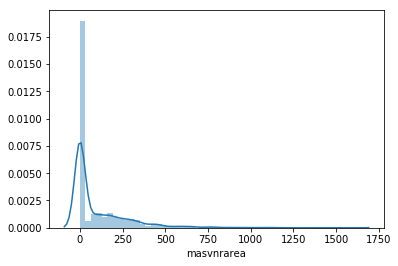

0.0

In [6]:
sns.distplot(houseprice_df[houseprice_df['masvnrarea'].notnull()]['masvnrarea'])
plt.show()
houseprice_df[houseprice_df['masvnrarea'].notnull()]['masvnrarea'].median()

The distribution of **masvnrarea** is highly skewed into 0, over the half of data is 0. That means **masvnrtype** also less meaningful to explain the sales price. So, we exclude both variables in this analysis.

There is just 1 missing value in **electrical** variable. So we fill this value with mode.

In [7]:
houseprice_df['electrical'] = houseprice_df['electrical'].fillna(houseprice_df['electrical'].mode()[0])

In [8]:
dropList = ['poolqc','miscfeature','alley','fence','fireplacequ','lotfrontage','garagecond','garagetype','garageyrblt','garagefinish','garagequal','bsmtexposure','bsmtfintype2','bsmtfintype1','bsmtcond','bsmtqual','masvnrarea','masvnrtype']
houseprice_df = houseprice_df.drop(columns=dropList)

In [9]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
exterqual        1460 non-

We keep **63 variables** for this analysis.

## EDA and Feature Engineering

### Handling continuous variables

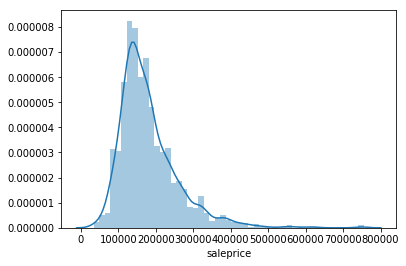

In [10]:
sns.distplot(houseprice_df['saleprice'])
plt.show()

In [11]:
#skewness and kurtosis
print("Skewness: %f" % houseprice_df['saleprice'].skew())

Skewness: 1.882876


In [12]:
houseprice_df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

The average price is $18921 (std = 79442).
The distribution of **saleprice** looks skewed.


In [13]:
numerical_columList = houseprice_df.select_dtypes(exclude = ['object']).columns
nonNumerical_columList = houseprice_df.select_dtypes(['object']).columns

In [14]:
numerical_columList = numerical_columList.drop('id')

In [15]:
houseprice_df[numerical_columList].corr()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotarea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
bsmtfinsf1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
bsmtfinsf2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
bsmtunfsf,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
totalbsmtsf,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


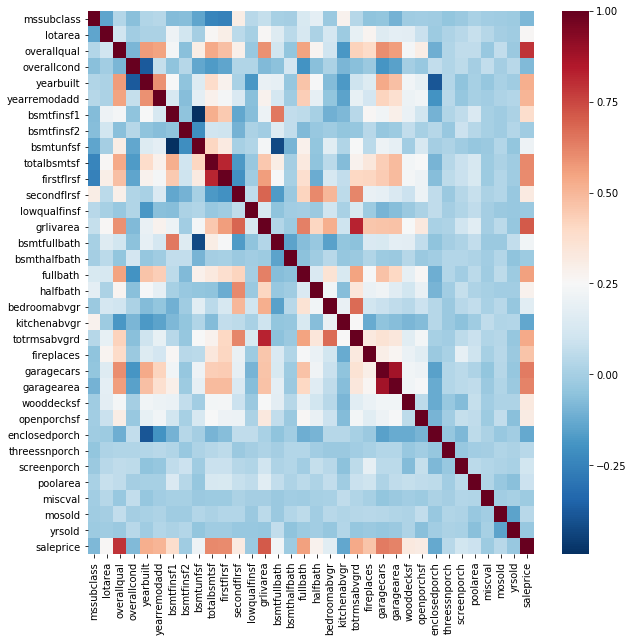

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(houseprice_df[numerical_columList].corr(), cmap="RdBu_r")
plt.show()

In [17]:
np.abs(houseprice_df[numerical_columList].corr()['saleprice'].sort_values(ascending=False)).head(10)

saleprice       1.000000
overallqual     0.790982
grlivarea       0.708624
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
firstflrsf      0.605852
fullbath        0.560664
totrmsabvgrd    0.533723
yearbuilt       0.522897
Name: saleprice, dtype: float64

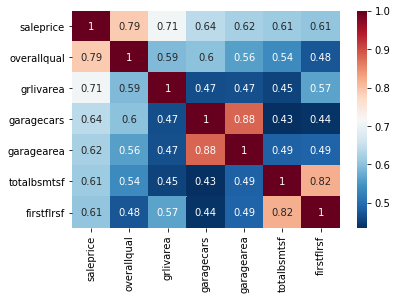

In [18]:
over60Corr = ['saleprice','overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf']
sns.heatmap(houseprice_df[over60Corr].corr(), cmap="RdBu_r", annot=True)
plt.show()

**overallqual**, **grlivarea**, **garagecars**, **garagearea**, and **totalbsmtsf** are correlated with saleprice.

**garagearea** and **garagecars** are highly correlated (>0.88), so we will exclude **garagearea** in this analysis.

**firstflrsf** and **totalbsmtsf** are highly correlated (>0.82), so we will also exclude **firstflrsf** in this analysis.

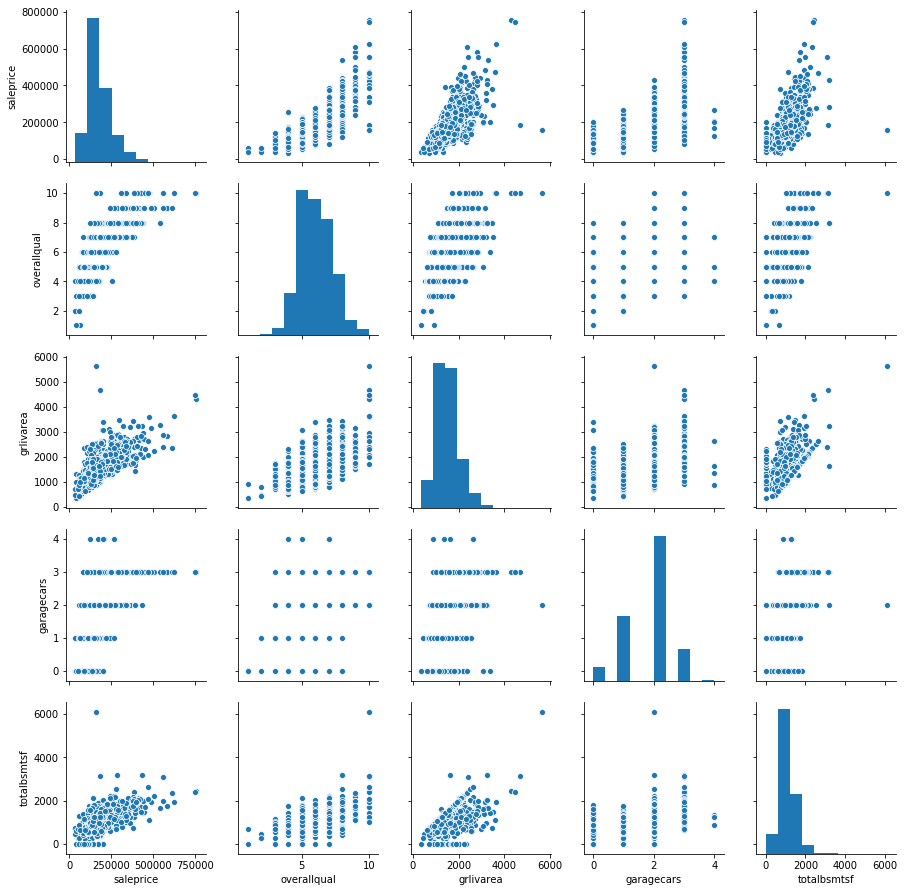

In [19]:
featureContList = ['saleprice','overallqual','grlivarea','garagecars','totalbsmtsf']
sns.pairplot(houseprice_df[featureContList])
plt.show()

### Winsorization for outliers

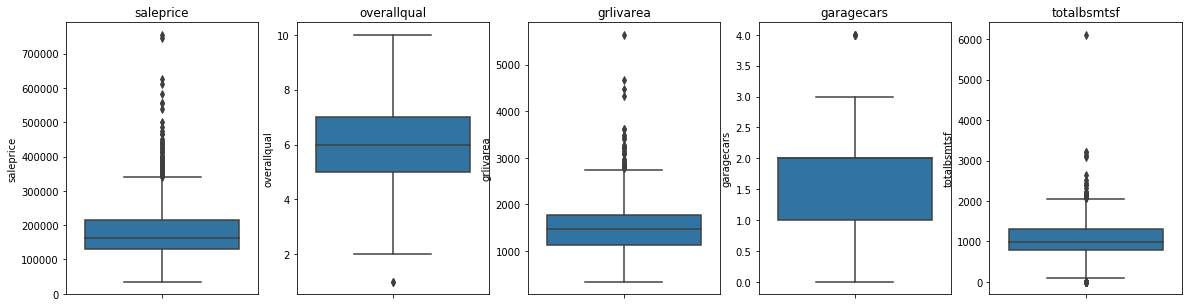

In [20]:
# Plotting Boxplots for every columns
plt.figure(figsize=(20,5))
for i in range(0, len(featureContList)):
    plt.subplot(1,5,i+1)
    sns.boxplot(houseprice_df["%s" % featureContList[i]],whis=1.5, orient='v')
    plt.title(featureContList[i])
plt.show()

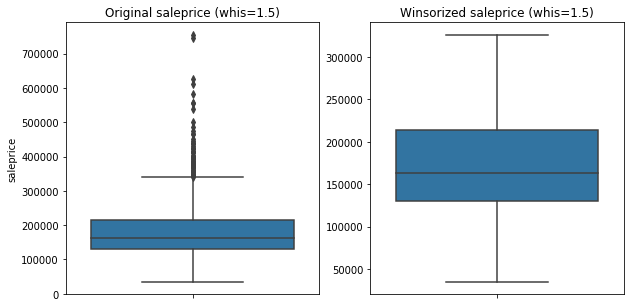

In [21]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(houseprice_df["saleprice"], orient = 'v')
plt.title("Original saleprice (whis=1.5)")
winsorized_saleprice = winsorize(houseprice_df["saleprice"], (0, 0.05))
plt.subplot(1,2,2)
sns.boxplot(winsorized_saleprice, orient = 'v')
plt.title("Winsorized saleprice (whis=1.5)")
plt.show()

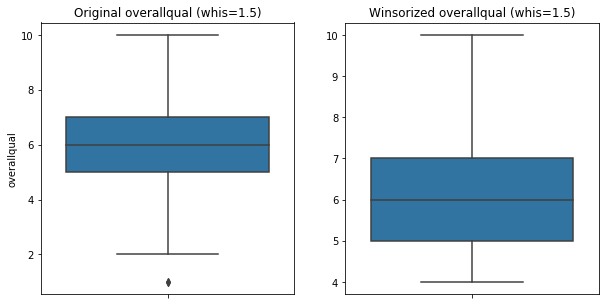

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(houseprice_df["overallqual"], orient = 'v')
plt.title("Original overallqual (whis=1.5)")
winsorized_overallqual = winsorize(houseprice_df["overallqual"], (0.05, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_overallqual, orient = 'v')
plt.title("Winsorized overallqual (whis=1.5)")
plt.show()

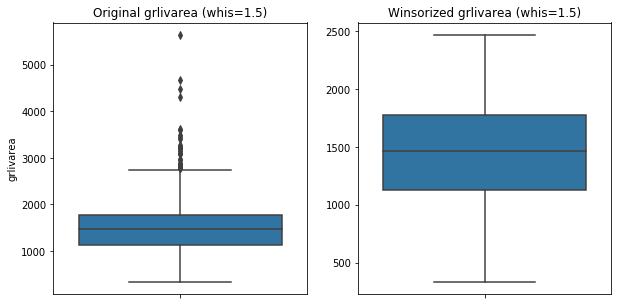

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(houseprice_df["grlivarea"], orient = 'v')
plt.title("Original grlivarea (whis=1.5)")
winsorized_grlivarea = winsorize(houseprice_df["grlivarea"], (0, 0.05))
plt.subplot(1,2,2)
sns.boxplot(winsorized_grlivarea, orient = 'v')
plt.title("Winsorized grlivarea (whis=1.5)")
plt.show()

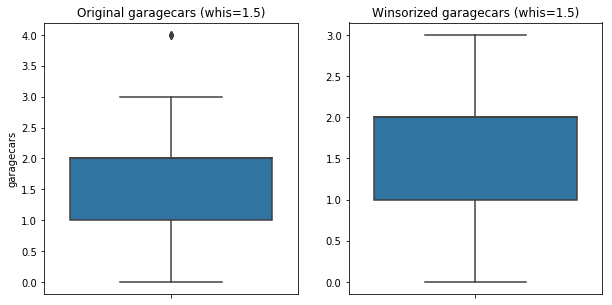

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(houseprice_df["garagecars"], orient = 'v')
plt.title("Original garagecars (whis=1.5)")
winsorized_garagecars = winsorize(houseprice_df["garagecars"], (0, 0.05))
plt.subplot(1,2,2)
sns.boxplot(winsorized_garagecars, orient = 'v')
plt.title("Winsorized garagecars (whis=1.5)")
plt.show()

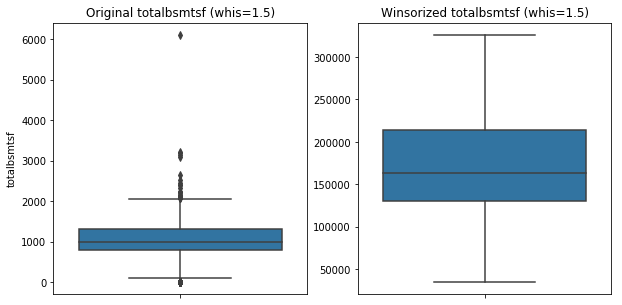

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(houseprice_df["totalbsmtsf"], orient = 'v')
plt.title("Original totalbsmtsf (whis=1.5)")
winsorized_totalbsmtsf = winsorize(houseprice_df["totalbsmtsf"], (0.05, 0.05))
plt.subplot(1,2,2)
sns.boxplot(winsorized_saleprice, orient = 'v')
plt.title("Winsorized totalbsmtsf (whis=1.5)")
plt.show()

In [26]:
houseprice_df['winsorized_saleprice'] = winsorized_saleprice
houseprice_df['winsorized_overallqual'] = winsorized_overallqual
houseprice_df['winsorized_grlivarea'] = winsorized_grlivarea
houseprice_df['winsorized_garagecars'] = winsorized_garagecars
houseprice_df['winsorized_totalbsmtsf'] = winsorized_totalbsmtsf

In [27]:
winsorizedList = ['winsorized_saleprice','winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf']

### Handling categorical variables

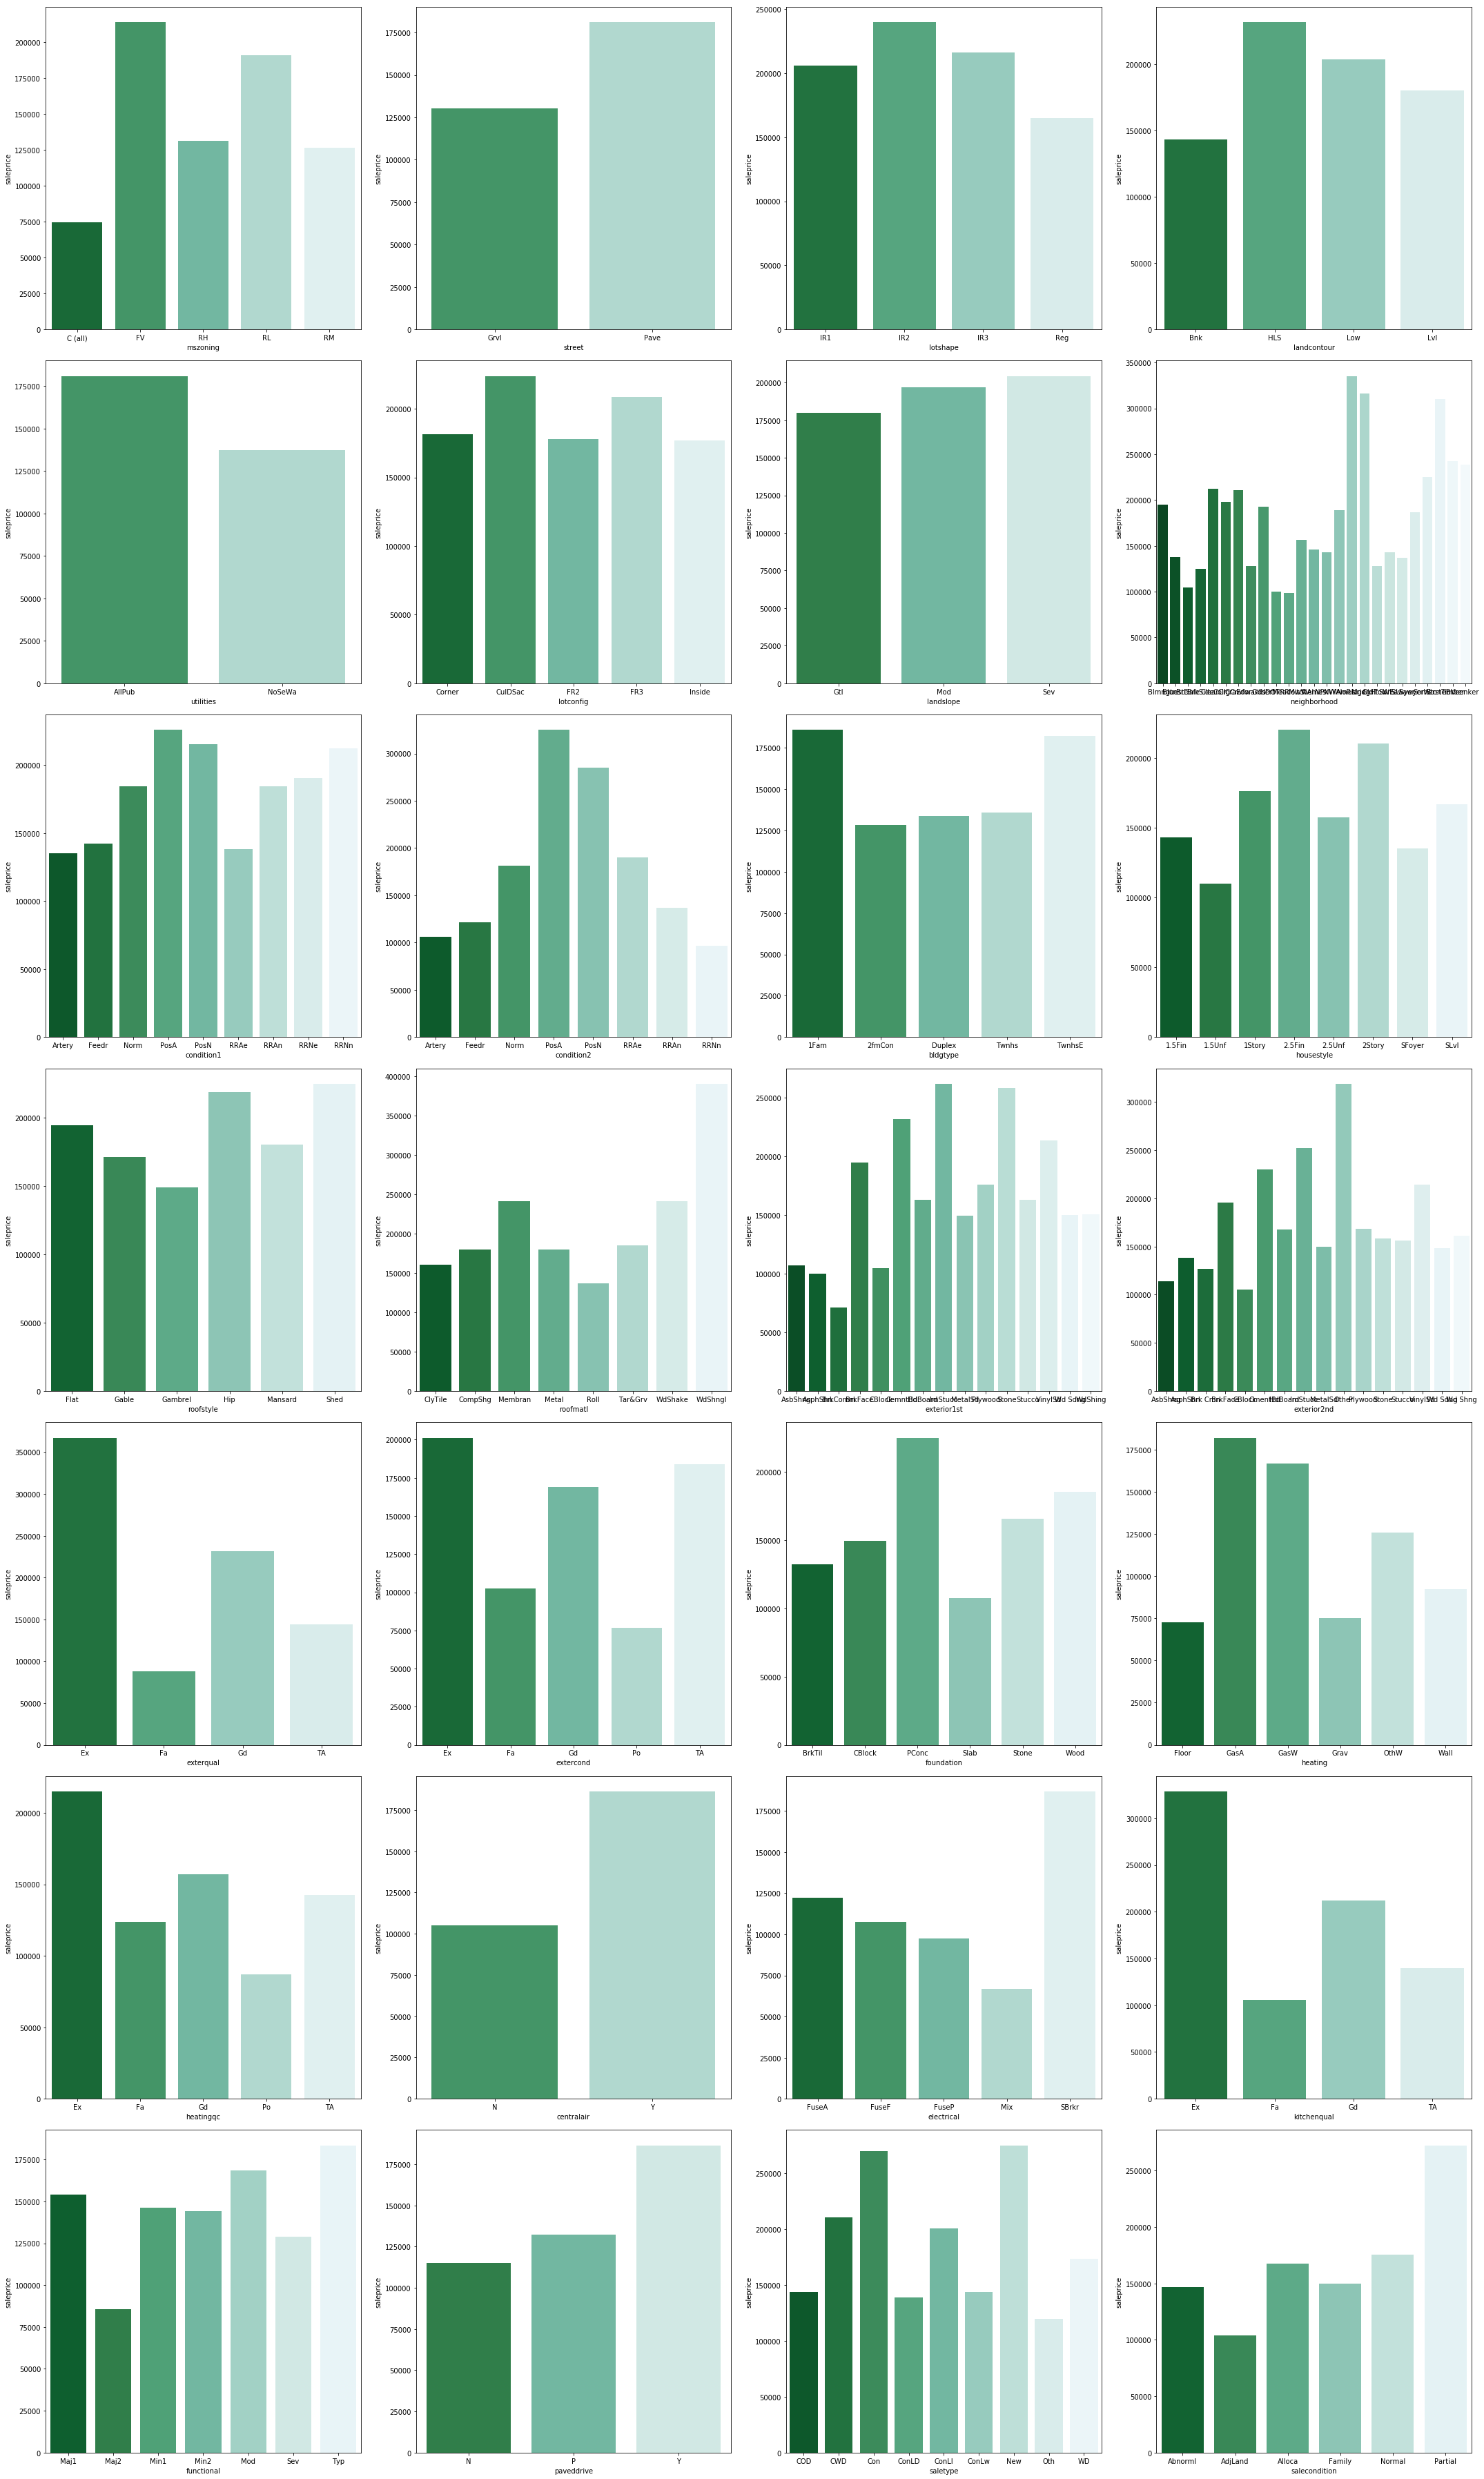

In [28]:
plt.figure(figsize=(30,50))

for i in range(len(nonNumerical_columList)) :
    tmp_df = houseprice_df.groupby(nonNumerical_columList[i])['saleprice'].mean().reset_index()
    plt.subplot(7,4,i+1)
    sns.barplot(x = nonNumerical_columList[i], y='saleprice', data=tmp_df, palette='BuGn_r')
plt.tight_layout()
plt.show()

According to the graphs above, **mszoning** and **street** have the difference between the categories as visually, so we select these variables as the feature to explain the salesprice.

In [29]:
# Make dummy
houseprice_df = pd.concat([houseprice_df,pd.get_dummies(houseprice_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houseprice_df = pd.concat([houseprice_df,pd.get_dummies(houseprice_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houseprice_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprice_df.street, prefix="street", drop_first=True).columns)

## Evaluating performance

In [31]:
import statsmodels.api as sm

# Y is the target variable
Y = houseprice_df['winsorized_saleprice']
# X is the feature set
X = houseprice_df[['winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)
## Split into train and test sets
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.837
Model:                              OLS   Adj. R-squared:                  0.836
Method:                   Least Squares   F-statistic:                     827.5
Date:                  Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                          11:48:12   Log-Likelihood:                -16941.
No. Observations:                  1460   AIC:                         3.390e+04
Df Residuals:                      1450   BIC:                         3.396e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.097e+05   1.25e+04     -8.761      0.000   -1.34e+05   -8.52e+04
winsorized_overallqual  1.977e+04    778.488     25.393      0.000    1.82e+04    2.13e+04
winsorized_grlivarea      44.4562      1.949     22.805      0.000      40.632      48.280
winsorized_garagecars   1.368e+04   1252.430     10.921      0.000    1.12e+04    1.61e+04
winsorized_totalbsmtsf    38.8184      2.512     15.451      0.000      33.890      43.747
mszoning_FV             4.479e+04   9446.818      4.741      0.000    2.63e+04    6.33e+04
mszoning_RH             2.487e+04    1.1e+04      2.267      0.024    3351.212    4.64e+04
mszoning_RL             3.872e+04   8791.617      4.404      0.000    2.15e+04     5.6e+04
mszoning_RM             2.006e+04   8901.301      2.254      0.024    2602.924    3.75e+04
street_Pave            -1919.4048   1.13e+04     -0.170      0.865   -2.41e+04    2.02e+04
==============================================================================
Omnibus:                      155.510   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.067
Skew:                          -0.445   Prob(JB):                    6.83e-137
Kurtosis:                       6.085   Cond. No.                     5.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**mszoning_RM**, **mszoning_RH** and **street_Pave** are statistically insignificant (> 0.01) and hence their coefficients are statistically zero.
Now let's exclude statistically insignificant variables from the model and re-estimate it:

In [32]:
dummy_column_names.remove('mszoning_RM')
dummy_column_names.remove('mszoning_RH')
dummy_column_names.remove('street_Pave')

In [33]:
# Y is the target variable
Y = houseprice_df['winsorized_saleprice']
# X is the feature set
X = houseprice_df[['winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)
## Split into train and test sets
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.836
Model:                              OLS   Adj. R-squared:                  0.836
Method:                   Least Squares   F-statistic:                     1238.
Date:                  Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                          11:48:22   Log-Likelihood:                -16944.
No. Observations:                  1460   AIC:                         3.390e+04
Df Residuals:                      1453   BIC:                         3.394e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -9.26e+04   3488.507    -26.544      0.000   -9.94e+04   -8.58e+04
winsorized_overallqual  1.991e+04    775.347     25.677      0.000    1.84e+04    2.14e+04
winsorized_grlivarea      44.4472      1.947     22.832      0.000      40.629      48.266
winsorized_garagecars   1.354e+04   1248.655     10.844      0.000    1.11e+04     1.6e+04
winsorized_totalbsmtsf    38.7542      2.513     15.422      0.000      33.825      43.684
mszoning_FV             2.508e+04   3857.371      6.501      0.000    1.75e+04    3.26e+04
mszoning_RL             1.912e+04   1988.270      9.618      0.000    1.52e+04     2.3e+04
==============================================================================
Omnibus:                      155.846   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.936
Skew:                          -0.450   Prob(JB):                    5.39e-136
Kurtosis:                       6.071   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model's F statistic is 836.9, and the associated p-value is very close to zero. This means that our features add some information to the reduced model and our model is useful in explaining charges. According to the R-squared almost 84% of the variance in the target variable is explained by the model, and this value is not bad. However, based on AIC and BIC value, there is the overfitting problem in this model.

In order to improve the goodness of fit of your model, try different model specifications by adding the interaction variable between total square feet and overall quality.

In [34]:
houseprice_df['totalsf'] = houseprice_df['totalbsmtsf'] + houseprice_df['firstflrsf'] + houseprice_df['secondflrsf']

houseprice_df['int_over_sf'] = houseprice_df['totalsf'] * houseprice_df['overallqual']

# Y is the target variable
Y = np.log1p(houseprice_df['winsorized_saleprice'])
# X is the feature set
X = houseprice_df[['winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf','int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     winsorized_saleprice   R-squared:                       0.828
Model:                              OLS   Adj. R-squared:                  0.827
Method:                   Least Squares   F-statistic:                     995.3
Date:                  Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                          11:48:23   Log-Likelihood:                 641.10
No. Observations:                  1460   AIC:                            -1266.
Df Residuals:                      1452   BIC:                            -1224.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.3085      0.035    296.236      0.000      10.240      10.377
winsorized_overallqual     0.1331      0.006     20.853      0.000       0.121       0.146
winsorized_grlivarea       0.0003   1.45e-05     21.560      0.000       0.000       0.000
winsorized_garagecars      0.0886      0.007     12.056      0.000       0.074       0.103
winsorized_totalbsmtsf     0.0003   1.81e-05     14.677      0.000       0.000       0.000
int_over_sf            -9.194e-06   1.37e-06     -6.711      0.000   -1.19e-05   -6.51e-06
mszoning_FV                0.2041      0.023      8.957      0.000       0.159       0.249
mszoning_RL                0.1611      0.012     13.763      0.000       0.138       0.184
==============================================================================
Omnibus:                      329.386   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1062.512
Skew:                          -1.107   Prob(JB):                    1.90e-231
Kurtosis:                       6.545   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic is significant.
R-squared values are decreased little bit however AIC and BIC values are also improved than the previous model. That means the overfitting problem is solved.

## Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# Y is the target variable
Y = houseprice_df['winsorized_saleprice']
# X is the feature set
X = houseprice_df[['winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf','int_over_sf'] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]


The number of observations in training set is 1168
The number of observations in test set is 292


In [36]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

### OLS regression

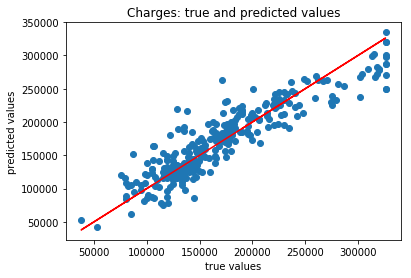

R-squared of the model in training set is: 0.8375917359317923
-----Test set statistics-----
R-squared of the model in test set is: 0.8298818162439262
Mean absolute error of the prediction is: 18857.084802998223
Mean squared error of the prediction is: 635919500.5340276
Root mean squared error of the prediction is: 25217.44436960311
Mean absolute percentage error of the prediction is: 12.102114726124254


In [37]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

### Lasso regression

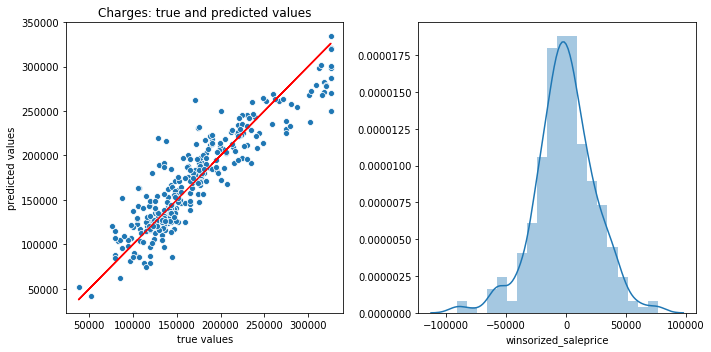

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8375917359317921
-----Test set statistics-----
R-squared of the model in test set is: 0.8298818162439241
Mean absolute error of the prediction is: 18857.08480299831
Mean squared error of the prediction is: 635919500.5340351
Root mean squared error of the prediction is: 25217.444369603258
Mean absolute percentage error of the prediction is: 12.102114726124336


In [38]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

### Ridge regression

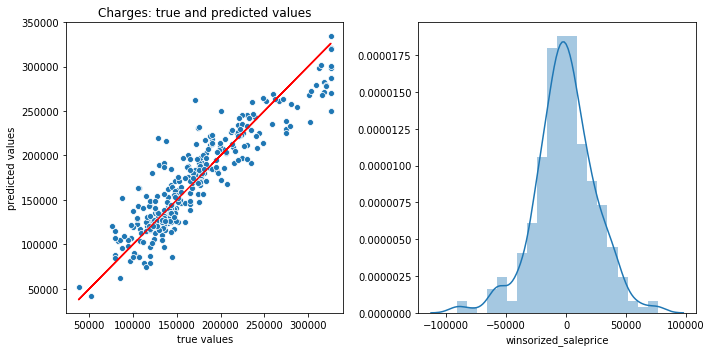

Best alpha value is: 0.1
R-squared of the model in training set is: 0.8375916973185729
-----Test set statistics-----
R-squared of the model in test set is: 0.8298754836205415
Mean absolute error of the prediction is: 18856.97005102179
Mean squared error of the prediction is: 635943172.5402228
Root mean squared error of the prediction is: 25217.9137229911
Mean absolute percentage error of the prediction is: 12.102163536807382


In [39]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

### ElasticNet regression

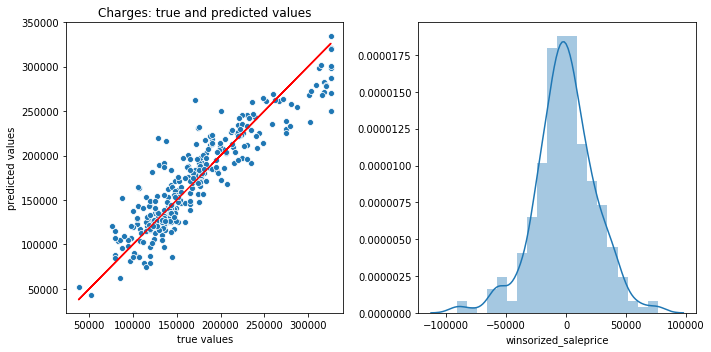

Best alpha value is: 0.1
R-squared of the model in training set is: 0.8375916973185729
-----Test set statistics-----
R-squared of the model in test set is: 0.8298754836205415
Mean absolute error of the prediction is: 18856.387827609877
Mean squared error of the prediction is: 636059734.0519286
Root mean squared error of the prediction is: 25220.224702645468
Mean absolute percentage error of the prediction is: 12.102373044970092


In [40]:
elasticNet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticNet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticNet_cv.predict(X_train)
y_preds_test = elasticNet_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

According to the analysis above, All regression methods have similar performance, but **Ridge regression** has little bit smaller error.

### So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.


We can include inflation rate by the year into the features.

In [54]:
inflation_df = pd.read_csv("inflationRate.txt", delimiter = '\t')

In [55]:
inflation_df = inflation_df[['YEAR','AVE']]
inflation_df = inflation_df.rename(columns={"YEAR": "yrsold"})

In [69]:
merge_df = pd.merge(inflation_df, houseprice_df, on= ['yrsold'])

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# Y is the target variable
Y = merge_df['winsorized_saleprice']
# X is the feature set
X = merge_df[['winsorized_overallqual','winsorized_grlivarea','winsorized_garagecars','winsorized_totalbsmtsf','int_over_sf',"AVE"] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]



The number of observations in training set is 1168
The number of observations in test set is 292


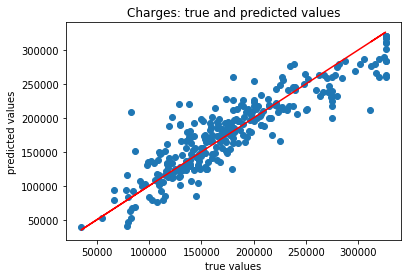

R-squared of the model in training set is: 0.8436954699266579
-----Test set statistics-----
R-squared of the model in test set is: 0.8064525536771223
Mean absolute error of the prediction is: 21271.979414154244
Mean squared error of the prediction is: 815250244.031703
Root mean squared error of the prediction is: 28552.587343911637
Mean absolute percentage error of the prediction is: 13.462799586856168


In [76]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

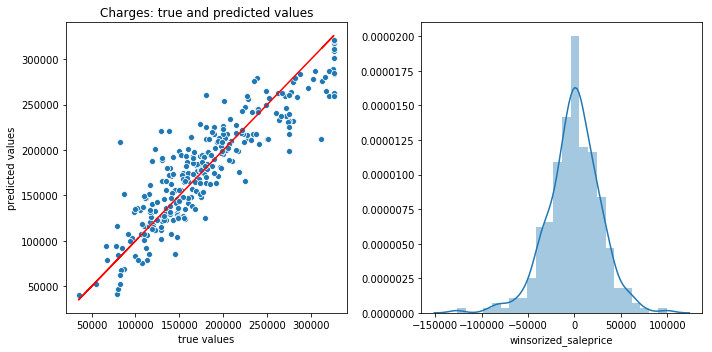

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8436954699266579
-----Test set statistics-----
R-squared of the model in test set is: 0.8064525536771231
Mean absolute error of the prediction is: 21271.979414154142
Mean squared error of the prediction is: 815250244.0316997
Root mean squared error of the prediction is: 28552.58734391158
Mean absolute percentage error of the prediction is: 13.46279958685608


In [77]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

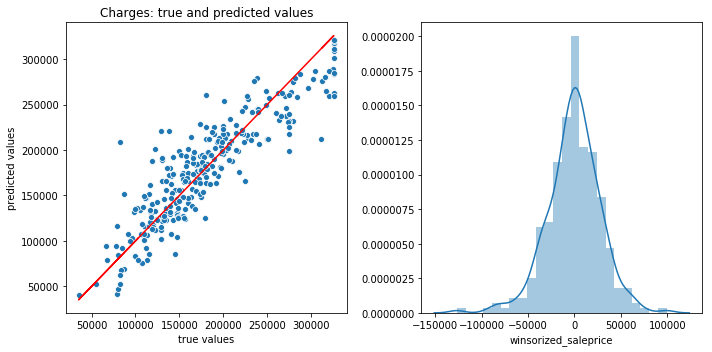

Best alpha value is: 0.1
R-squared of the model in training set is: 0.8436954324463593
-----Test set statistics-----
R-squared of the model in test set is: 0.8064388232627817
Mean absolute error of the prediction is: 21272.026848992096
Mean squared error of the prediction is: 815308078.5516331
Root mean squared error of the prediction is: 28553.600097914677
Mean absolute percentage error of the prediction is: 13.462796122576808


In [78]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

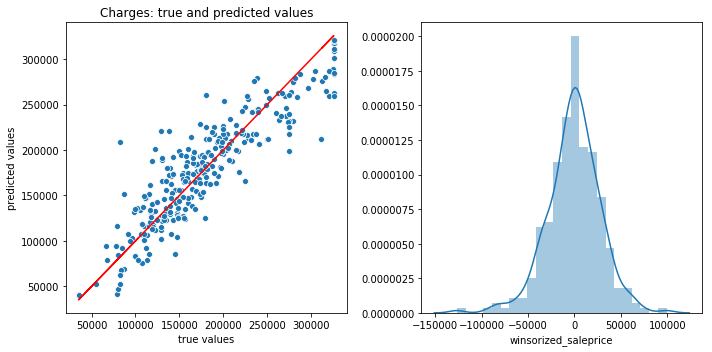

Best alpha value is: 0.1
R-squared of the model in training set is: 0.8436954324463593
-----Test set statistics-----
R-squared of the model in test set is: 0.8064388232627817
Mean absolute error of the prediction is: 21272.007421321032
Mean squared error of the prediction is: 815284019.0776541
Root mean squared error of the prediction is: 28553.178791119808
Mean absolute percentage error of the prediction is: 13.462797774532204


In [79]:
elasticNet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticNet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticNet_cv.predict(X_train)
y_preds_test = elasticNet_cv.predict(X_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.subplot(1,2,2)
sns.distplot(y_test-y_preds_test)
plt.tight_layout()
plt.show()

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

According to analysis above, when we include the inflation factor in the analysis, the prediction model can 1% more explain the data set. However, if the inflation rate are included in the features, the generalization gap is bigger than before. and all regression models have similar prediction performance but Lasso regression has little bit less error rate.